# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

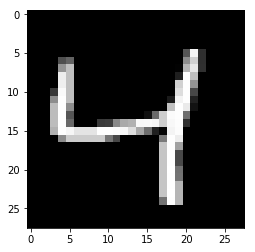

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)

image_size = mnist.train.images.shape[1]

encoding_dim = 10

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6917
Epoch: 1/20... Training loss: 0.6903
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6867
Epoch: 1/20... Training loss: 0.6850
Epoch: 1/20... Training loss: 0.6813
Epoch: 1/20... Training loss: 0.6797
Epoch: 1/20... Training loss: 0.6772
Epoch: 1/20... Training loss: 0.6729
Epoch: 1/20... Training loss: 0.6686
Epoch: 1/20... Training loss: 0.6652
Epoch: 1/20... Training loss: 0.6592
Epoch: 1/20... Training loss: 0.6560
Epoch: 1/20... Training loss: 0.6496
Epoch: 1/20... Training loss: 0.6440
Epoch: 1/20... Training loss: 0.6372
Epoch: 1/20... Training loss: 0.6330
Epoch: 1/20... Training loss: 0.6247
Epoch: 1/20... Training loss: 0.6162
Epoch: 1/20... Training loss: 0.6074
Epoch: 1/20... Training loss: 0.5987
Epoch: 1/20... Training loss: 0.5904
Epoch: 1/20... Training loss: 0.5811
Epoch: 1/20... Training loss: 0.5724
Epoch: 1/20... Training loss: 0.5594
Epoch: 1/20... Training loss: 0.5466
E

Epoch: 1/20... Training loss: 0.2388
Epoch: 1/20... Training loss: 0.2384
Epoch: 1/20... Training loss: 0.2370
Epoch: 1/20... Training loss: 0.2423
Epoch: 1/20... Training loss: 0.2380
Epoch: 1/20... Training loss: 0.2422
Epoch: 1/20... Training loss: 0.2423
Epoch: 1/20... Training loss: 0.2327
Epoch: 1/20... Training loss: 0.2335
Epoch: 1/20... Training loss: 0.2484
Epoch: 1/20... Training loss: 0.2614
Epoch: 1/20... Training loss: 0.2364
Epoch: 1/20... Training loss: 0.2465
Epoch: 1/20... Training loss: 0.2485
Epoch: 1/20... Training loss: 0.2478
Epoch: 1/20... Training loss: 0.2358
Epoch: 1/20... Training loss: 0.2331
Epoch: 1/20... Training loss: 0.2486
Epoch: 1/20... Training loss: 0.2396
Epoch: 1/20... Training loss: 0.2468
Epoch: 1/20... Training loss: 0.2371
Epoch: 1/20... Training loss: 0.2377
Epoch: 1/20... Training loss: 0.2258
Epoch: 1/20... Training loss: 0.2389
Epoch: 1/20... Training loss: 0.2389
Epoch: 1/20... Training loss: 0.2322
Epoch: 1/20... Training loss: 0.2251
E

Epoch: 2/20... Training loss: 0.2107
Epoch: 2/20... Training loss: 0.2098
Epoch: 2/20... Training loss: 0.2095
Epoch: 2/20... Training loss: 0.2092
Epoch: 2/20... Training loss: 0.2083
Epoch: 2/20... Training loss: 0.2040
Epoch: 2/20... Training loss: 0.2119
Epoch: 2/20... Training loss: 0.2088
Epoch: 2/20... Training loss: 0.2061
Epoch: 2/20... Training loss: 0.2077
Epoch: 2/20... Training loss: 0.2062
Epoch: 2/20... Training loss: 0.2069
Epoch: 2/20... Training loss: 0.2052
Epoch: 2/20... Training loss: 0.2066
Epoch: 2/20... Training loss: 0.2055
Epoch: 2/20... Training loss: 0.2093
Epoch: 2/20... Training loss: 0.2113
Epoch: 2/20... Training loss: 0.2021
Epoch: 2/20... Training loss: 0.2093
Epoch: 2/20... Training loss: 0.2079
Epoch: 2/20... Training loss: 0.2077
Epoch: 2/20... Training loss: 0.2110
Epoch: 2/20... Training loss: 0.2152
Epoch: 2/20... Training loss: 0.2051
Epoch: 2/20... Training loss: 0.2022
Epoch: 2/20... Training loss: 0.2040
Epoch: 2/20... Training loss: 0.2099
E

Epoch: 3/20... Training loss: 0.1930
Epoch: 3/20... Training loss: 0.1859
Epoch: 3/20... Training loss: 0.1848
Epoch: 3/20... Training loss: 0.1840
Epoch: 3/20... Training loss: 0.1913
Epoch: 3/20... Training loss: 0.1888
Epoch: 3/20... Training loss: 0.1831
Epoch: 3/20... Training loss: 0.1873
Epoch: 3/20... Training loss: 0.1923
Epoch: 3/20... Training loss: 0.1936
Epoch: 3/20... Training loss: 0.1903
Epoch: 3/20... Training loss: 0.1908
Epoch: 3/20... Training loss: 0.1814
Epoch: 3/20... Training loss: 0.1896
Epoch: 3/20... Training loss: 0.1887
Epoch: 3/20... Training loss: 0.1910
Epoch: 3/20... Training loss: 0.1888
Epoch: 3/20... Training loss: 0.1892
Epoch: 3/20... Training loss: 0.1918
Epoch: 3/20... Training loss: 0.1920
Epoch: 3/20... Training loss: 0.1904
Epoch: 3/20... Training loss: 0.1899
Epoch: 3/20... Training loss: 0.1921
Epoch: 3/20... Training loss: 0.1916
Epoch: 3/20... Training loss: 0.1886
Epoch: 3/20... Training loss: 0.1858
Epoch: 3/20... Training loss: 0.1886
E

Epoch: 4/20... Training loss: 0.1805
Epoch: 4/20... Training loss: 0.1779
Epoch: 4/20... Training loss: 0.1754
Epoch: 4/20... Training loss: 0.1768
Epoch: 4/20... Training loss: 0.1778
Epoch: 4/20... Training loss: 0.1827
Epoch: 4/20... Training loss: 0.1798
Epoch: 4/20... Training loss: 0.1786
Epoch: 4/20... Training loss: 0.1796
Epoch: 4/20... Training loss: 0.1761
Epoch: 4/20... Training loss: 0.1804
Epoch: 4/20... Training loss: 0.1770
Epoch: 4/20... Training loss: 0.1807
Epoch: 4/20... Training loss: 0.1760
Epoch: 4/20... Training loss: 0.1841
Epoch: 4/20... Training loss: 0.1817
Epoch: 4/20... Training loss: 0.1816
Epoch: 4/20... Training loss: 0.1773
Epoch: 4/20... Training loss: 0.1738
Epoch: 4/20... Training loss: 0.1759
Epoch: 4/20... Training loss: 0.1680
Epoch: 4/20... Training loss: 0.1822
Epoch: 4/20... Training loss: 0.1832
Epoch: 4/20... Training loss: 0.1743
Epoch: 4/20... Training loss: 0.1725
Epoch: 4/20... Training loss: 0.1754
Epoch: 4/20... Training loss: 0.1789
E

Epoch: 5/20... Training loss: 0.1731
Epoch: 5/20... Training loss: 0.1740
Epoch: 5/20... Training loss: 0.1783
Epoch: 5/20... Training loss: 0.1761
Epoch: 5/20... Training loss: 0.1761
Epoch: 5/20... Training loss: 0.1702
Epoch: 5/20... Training loss: 0.1719
Epoch: 5/20... Training loss: 0.1740
Epoch: 5/20... Training loss: 0.1690
Epoch: 5/20... Training loss: 0.1713
Epoch: 5/20... Training loss: 0.1730
Epoch: 5/20... Training loss: 0.1785
Epoch: 5/20... Training loss: 0.1697
Epoch: 5/20... Training loss: 0.1674
Epoch: 5/20... Training loss: 0.1729
Epoch: 5/20... Training loss: 0.1721
Epoch: 5/20... Training loss: 0.1739
Epoch: 5/20... Training loss: 0.1797
Epoch: 5/20... Training loss: 0.1755
Epoch: 5/20... Training loss: 0.1709
Epoch: 5/20... Training loss: 0.1751
Epoch: 5/20... Training loss: 0.1696
Epoch: 5/20... Training loss: 0.1704
Epoch: 5/20... Training loss: 0.1743
Epoch: 5/20... Training loss: 0.1724
Epoch: 5/20... Training loss: 0.1797
Epoch: 5/20... Training loss: 0.1750
E

Epoch: 5/20... Training loss: 0.1655
Epoch: 5/20... Training loss: 0.1691
Epoch: 5/20... Training loss: 0.1720
Epoch: 5/20... Training loss: 0.1701
Epoch: 5/20... Training loss: 0.1738
Epoch: 5/20... Training loss: 0.1689
Epoch: 5/20... Training loss: 0.1701
Epoch: 5/20... Training loss: 0.1689
Epoch: 5/20... Training loss: 0.1660
Epoch: 5/20... Training loss: 0.1695
Epoch: 5/20... Training loss: 0.1705
Epoch: 6/20... Training loss: 0.1678
Epoch: 6/20... Training loss: 0.1604
Epoch: 6/20... Training loss: 0.1681
Epoch: 6/20... Training loss: 0.1718
Epoch: 6/20... Training loss: 0.1629
Epoch: 6/20... Training loss: 0.1716
Epoch: 6/20... Training loss: 0.1680
Epoch: 6/20... Training loss: 0.1669
Epoch: 6/20... Training loss: 0.1647
Epoch: 6/20... Training loss: 0.1731
Epoch: 6/20... Training loss: 0.1699
Epoch: 6/20... Training loss: 0.1653
Epoch: 6/20... Training loss: 0.1728
Epoch: 6/20... Training loss: 0.1678
Epoch: 6/20... Training loss: 0.1652
Epoch: 6/20... Training loss: 0.1653
E

Epoch: 6/20... Training loss: 0.1642
Epoch: 6/20... Training loss: 0.1642
Epoch: 6/20... Training loss: 0.1615
Epoch: 6/20... Training loss: 0.1670
Epoch: 6/20... Training loss: 0.1714
Epoch: 6/20... Training loss: 0.1686
Epoch: 6/20... Training loss: 0.1709
Epoch: 6/20... Training loss: 0.1645
Epoch: 6/20... Training loss: 0.1658
Epoch: 6/20... Training loss: 0.1647
Epoch: 6/20... Training loss: 0.1666
Epoch: 6/20... Training loss: 0.1688
Epoch: 6/20... Training loss: 0.1663
Epoch: 6/20... Training loss: 0.1639
Epoch: 6/20... Training loss: 0.1715
Epoch: 6/20... Training loss: 0.1702
Epoch: 6/20... Training loss: 0.1655
Epoch: 6/20... Training loss: 0.1694
Epoch: 6/20... Training loss: 0.1677
Epoch: 6/20... Training loss: 0.1664
Epoch: 6/20... Training loss: 0.1636
Epoch: 6/20... Training loss: 0.1680
Epoch: 6/20... Training loss: 0.1705
Epoch: 6/20... Training loss: 0.1672
Epoch: 6/20... Training loss: 0.1677
Epoch: 6/20... Training loss: 0.1665
Epoch: 6/20... Training loss: 0.1655
E

Epoch: 7/20... Training loss: 0.1641
Epoch: 7/20... Training loss: 0.1635
Epoch: 7/20... Training loss: 0.1659
Epoch: 7/20... Training loss: 0.1672
Epoch: 7/20... Training loss: 0.1700
Epoch: 7/20... Training loss: 0.1639
Epoch: 7/20... Training loss: 0.1687
Epoch: 7/20... Training loss: 0.1674
Epoch: 7/20... Training loss: 0.1605
Epoch: 7/20... Training loss: 0.1615
Epoch: 7/20... Training loss: 0.1715
Epoch: 7/20... Training loss: 0.1682
Epoch: 7/20... Training loss: 0.1651
Epoch: 7/20... Training loss: 0.1646
Epoch: 7/20... Training loss: 0.1622
Epoch: 7/20... Training loss: 0.1648
Epoch: 7/20... Training loss: 0.1666
Epoch: 7/20... Training loss: 0.1663
Epoch: 7/20... Training loss: 0.1672
Epoch: 7/20... Training loss: 0.1640
Epoch: 7/20... Training loss: 0.1616
Epoch: 7/20... Training loss: 0.1611
Epoch: 7/20... Training loss: 0.1688
Epoch: 7/20... Training loss: 0.1631
Epoch: 7/20... Training loss: 0.1627
Epoch: 7/20... Training loss: 0.1606
Epoch: 7/20... Training loss: 0.1653
E

Epoch: 8/20... Training loss: 0.1574
Epoch: 8/20... Training loss: 0.1589
Epoch: 8/20... Training loss: 0.1592
Epoch: 8/20... Training loss: 0.1649
Epoch: 8/20... Training loss: 0.1633
Epoch: 8/20... Training loss: 0.1615
Epoch: 8/20... Training loss: 0.1619
Epoch: 8/20... Training loss: 0.1647
Epoch: 8/20... Training loss: 0.1667
Epoch: 8/20... Training loss: 0.1658
Epoch: 8/20... Training loss: 0.1612
Epoch: 8/20... Training loss: 0.1703
Epoch: 8/20... Training loss: 0.1597
Epoch: 8/20... Training loss: 0.1667
Epoch: 8/20... Training loss: 0.1614
Epoch: 8/20... Training loss: 0.1597
Epoch: 8/20... Training loss: 0.1569
Epoch: 8/20... Training loss: 0.1624
Epoch: 8/20... Training loss: 0.1708
Epoch: 8/20... Training loss: 0.1632
Epoch: 8/20... Training loss: 0.1680
Epoch: 8/20... Training loss: 0.1681
Epoch: 8/20... Training loss: 0.1607
Epoch: 8/20... Training loss: 0.1617
Epoch: 8/20... Training loss: 0.1635
Epoch: 8/20... Training loss: 0.1589
Epoch: 8/20... Training loss: 0.1623
E

Epoch: 9/20... Training loss: 0.1635
Epoch: 9/20... Training loss: 0.1654
Epoch: 9/20... Training loss: 0.1616
Epoch: 9/20... Training loss: 0.1606
Epoch: 9/20... Training loss: 0.1605
Epoch: 9/20... Training loss: 0.1627
Epoch: 9/20... Training loss: 0.1576
Epoch: 9/20... Training loss: 0.1618
Epoch: 9/20... Training loss: 0.1636
Epoch: 9/20... Training loss: 0.1631
Epoch: 9/20... Training loss: 0.1630
Epoch: 9/20... Training loss: 0.1648
Epoch: 9/20... Training loss: 0.1599
Epoch: 9/20... Training loss: 0.1593
Epoch: 9/20... Training loss: 0.1658
Epoch: 9/20... Training loss: 0.1563
Epoch: 9/20... Training loss: 0.1640
Epoch: 9/20... Training loss: 0.1583
Epoch: 9/20... Training loss: 0.1646
Epoch: 9/20... Training loss: 0.1642
Epoch: 9/20... Training loss: 0.1513
Epoch: 9/20... Training loss: 0.1577
Epoch: 9/20... Training loss: 0.1619
Epoch: 9/20... Training loss: 0.1546
Epoch: 9/20... Training loss: 0.1607
Epoch: 9/20... Training loss: 0.1623
Epoch: 9/20... Training loss: 0.1591
E

Epoch: 9/20... Training loss: 0.1616
Epoch: 9/20... Training loss: 0.1556
Epoch: 9/20... Training loss: 0.1603
Epoch: 9/20... Training loss: 0.1604
Epoch: 9/20... Training loss: 0.1540
Epoch: 9/20... Training loss: 0.1631
Epoch: 10/20... Training loss: 0.1610
Epoch: 10/20... Training loss: 0.1598
Epoch: 10/20... Training loss: 0.1608
Epoch: 10/20... Training loss: 0.1577
Epoch: 10/20... Training loss: 0.1652
Epoch: 10/20... Training loss: 0.1627
Epoch: 10/20... Training loss: 0.1563
Epoch: 10/20... Training loss: 0.1622
Epoch: 10/20... Training loss: 0.1556
Epoch: 10/20... Training loss: 0.1611
Epoch: 10/20... Training loss: 0.1613
Epoch: 10/20... Training loss: 0.1627
Epoch: 10/20... Training loss: 0.1619
Epoch: 10/20... Training loss: 0.1592
Epoch: 10/20... Training loss: 0.1645
Epoch: 10/20... Training loss: 0.1635
Epoch: 10/20... Training loss: 0.1610
Epoch: 10/20... Training loss: 0.1668
Epoch: 10/20... Training loss: 0.1673
Epoch: 10/20... Training loss: 0.1594
Epoch: 10/20... Tr

Epoch: 10/20... Training loss: 0.1543
Epoch: 10/20... Training loss: 0.1626
Epoch: 10/20... Training loss: 0.1613
Epoch: 10/20... Training loss: 0.1632
Epoch: 10/20... Training loss: 0.1615
Epoch: 10/20... Training loss: 0.1580
Epoch: 10/20... Training loss: 0.1594
Epoch: 10/20... Training loss: 0.1575
Epoch: 10/20... Training loss: 0.1678
Epoch: 10/20... Training loss: 0.1618
Epoch: 10/20... Training loss: 0.1578
Epoch: 10/20... Training loss: 0.1575
Epoch: 10/20... Training loss: 0.1639
Epoch: 10/20... Training loss: 0.1547
Epoch: 10/20... Training loss: 0.1642
Epoch: 10/20... Training loss: 0.1678
Epoch: 10/20... Training loss: 0.1563
Epoch: 10/20... Training loss: 0.1587
Epoch: 10/20... Training loss: 0.1577
Epoch: 10/20... Training loss: 0.1607
Epoch: 10/20... Training loss: 0.1578
Epoch: 10/20... Training loss: 0.1569
Epoch: 10/20... Training loss: 0.1612
Epoch: 10/20... Training loss: 0.1608
Epoch: 10/20... Training loss: 0.1671
Epoch: 10/20... Training loss: 0.1612
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1605
Epoch: 11/20... Training loss: 0.1646
Epoch: 11/20... Training loss: 0.1642
Epoch: 11/20... Training loss: 0.1586
Epoch: 11/20... Training loss: 0.1535
Epoch: 11/20... Training loss: 0.1612
Epoch: 11/20... Training loss: 0.1621
Epoch: 11/20... Training loss: 0.1521
Epoch: 11/20... Training loss: 0.1617
Epoch: 11/20... Training loss: 0.1519
Epoch: 11/20... Training loss: 0.1598
Epoch: 11/20... Training loss: 0.1567
Epoch: 11/20... Training loss: 0.1617
Epoch: 11/20... Training loss: 0.1589
Epoch: 11/20... Training loss: 0.1574
Epoch: 11/20... Training loss: 0.1572
Epoch: 11/20... Training loss: 0.1627
Epoch: 11/20... Training loss: 0.1540
Epoch: 11/20... Training loss: 0.1634
Epoch: 11/20... Training loss: 0.1486
Epoch: 11/20... Training loss: 0.1614
Epoch: 11/20... Training loss: 0.1577
Epoch: 11/20... Training loss: 0.1554
Epoch: 11/20... Training loss: 0.1562
Epoch: 11/20... Training loss: 0.1578
Epoch: 11/20... Training loss: 0.1603
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1624
Epoch: 12/20... Training loss: 0.1576
Epoch: 12/20... Training loss: 0.1644
Epoch: 12/20... Training loss: 0.1560
Epoch: 12/20... Training loss: 0.1610
Epoch: 12/20... Training loss: 0.1637
Epoch: 12/20... Training loss: 0.1637
Epoch: 12/20... Training loss: 0.1519
Epoch: 12/20... Training loss: 0.1563
Epoch: 12/20... Training loss: 0.1580
Epoch: 12/20... Training loss: 0.1534
Epoch: 12/20... Training loss: 0.1646
Epoch: 12/20... Training loss: 0.1553
Epoch: 12/20... Training loss: 0.1589
Epoch: 12/20... Training loss: 0.1631
Epoch: 12/20... Training loss: 0.1586
Epoch: 12/20... Training loss: 0.1561
Epoch: 12/20... Training loss: 0.1628
Epoch: 12/20... Training loss: 0.1571
Epoch: 12/20... Training loss: 0.1560
Epoch: 12/20... Training loss: 0.1622
Epoch: 12/20... Training loss: 0.1627
Epoch: 12/20... Training loss: 0.1633
Epoch: 12/20... Training loss: 0.1608
Epoch: 12/20... Training loss: 0.1505
Epoch: 12/20... Training loss: 0.1586
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1603
Epoch: 13/20... Training loss: 0.1627
Epoch: 13/20... Training loss: 0.1608
Epoch: 13/20... Training loss: 0.1553
Epoch: 13/20... Training loss: 0.1551
Epoch: 13/20... Training loss: 0.1521
Epoch: 13/20... Training loss: 0.1530
Epoch: 13/20... Training loss: 0.1579
Epoch: 13/20... Training loss: 0.1563
Epoch: 13/20... Training loss: 0.1618
Epoch: 13/20... Training loss: 0.1555
Epoch: 13/20... Training loss: 0.1607
Epoch: 13/20... Training loss: 0.1546
Epoch: 13/20... Training loss: 0.1561
Epoch: 13/20... Training loss: 0.1510
Epoch: 13/20... Training loss: 0.1547
Epoch: 13/20... Training loss: 0.1579
Epoch: 13/20... Training loss: 0.1597
Epoch: 13/20... Training loss: 0.1603
Epoch: 13/20... Training loss: 0.1537
Epoch: 13/20... Training loss: 0.1597
Epoch: 13/20... Training loss: 0.1607
Epoch: 13/20... Training loss: 0.1581
Epoch: 13/20... Training loss: 0.1567
Epoch: 13/20... Training loss: 0.1601
Epoch: 13/20... Training loss: 0.1593
Epoch: 13/20

Epoch: 13/20... Training loss: 0.1597
Epoch: 13/20... Training loss: 0.1562
Epoch: 13/20... Training loss: 0.1552
Epoch: 13/20... Training loss: 0.1491
Epoch: 13/20... Training loss: 0.1560
Epoch: 13/20... Training loss: 0.1532
Epoch: 14/20... Training loss: 0.1545
Epoch: 14/20... Training loss: 0.1527
Epoch: 14/20... Training loss: 0.1587
Epoch: 14/20... Training loss: 0.1536
Epoch: 14/20... Training loss: 0.1561
Epoch: 14/20... Training loss: 0.1581
Epoch: 14/20... Training loss: 0.1542
Epoch: 14/20... Training loss: 0.1595
Epoch: 14/20... Training loss: 0.1554
Epoch: 14/20... Training loss: 0.1570
Epoch: 14/20... Training loss: 0.1598
Epoch: 14/20... Training loss: 0.1616
Epoch: 14/20... Training loss: 0.1607
Epoch: 14/20... Training loss: 0.1612
Epoch: 14/20... Training loss: 0.1631
Epoch: 14/20... Training loss: 0.1545
Epoch: 14/20... Training loss: 0.1574
Epoch: 14/20... Training loss: 0.1563
Epoch: 14/20... Training loss: 0.1559
Epoch: 14/20... Training loss: 0.1602
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1608
Epoch: 14/20... Training loss: 0.1592
Epoch: 14/20... Training loss: 0.1595
Epoch: 14/20... Training loss: 0.1574
Epoch: 14/20... Training loss: 0.1561
Epoch: 14/20... Training loss: 0.1570
Epoch: 14/20... Training loss: 0.1536
Epoch: 14/20... Training loss: 0.1588
Epoch: 14/20... Training loss: 0.1510
Epoch: 14/20... Training loss: 0.1556
Epoch: 14/20... Training loss: 0.1566
Epoch: 14/20... Training loss: 0.1636
Epoch: 14/20... Training loss: 0.1603
Epoch: 14/20... Training loss: 0.1560
Epoch: 14/20... Training loss: 0.1472
Epoch: 14/20... Training loss: 0.1546
Epoch: 14/20... Training loss: 0.1517
Epoch: 14/20... Training loss: 0.1560
Epoch: 14/20... Training loss: 0.1552
Epoch: 14/20... Training loss: 0.1536
Epoch: 14/20... Training loss: 0.1551
Epoch: 14/20... Training loss: 0.1559
Epoch: 14/20... Training loss: 0.1615
Epoch: 14/20... Training loss: 0.1637
Epoch: 14/20... Training loss: 0.1545
Epoch: 14/20... Training loss: 0.1510
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1559
Epoch: 15/20... Training loss: 0.1576
Epoch: 15/20... Training loss: 0.1598
Epoch: 15/20... Training loss: 0.1573
Epoch: 15/20... Training loss: 0.1577
Epoch: 15/20... Training loss: 0.1495
Epoch: 15/20... Training loss: 0.1526
Epoch: 15/20... Training loss: 0.1528
Epoch: 15/20... Training loss: 0.1614
Epoch: 15/20... Training loss: 0.1583
Epoch: 15/20... Training loss: 0.1597
Epoch: 15/20... Training loss: 0.1553
Epoch: 15/20... Training loss: 0.1551
Epoch: 15/20... Training loss: 0.1585
Epoch: 15/20... Training loss: 0.1556
Epoch: 15/20... Training loss: 0.1581
Epoch: 15/20... Training loss: 0.1608
Epoch: 15/20... Training loss: 0.1576
Epoch: 15/20... Training loss: 0.1532
Epoch: 15/20... Training loss: 0.1554
Epoch: 15/20... Training loss: 0.1578
Epoch: 15/20... Training loss: 0.1633
Epoch: 15/20... Training loss: 0.1554
Epoch: 15/20... Training loss: 0.1588
Epoch: 15/20... Training loss: 0.1569
Epoch: 15/20... Training loss: 0.1620
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1622
Epoch: 16/20... Training loss: 0.1601
Epoch: 16/20... Training loss: 0.1547
Epoch: 16/20... Training loss: 0.1583
Epoch: 16/20... Training loss: 0.1556
Epoch: 16/20... Training loss: 0.1566
Epoch: 16/20... Training loss: 0.1564
Epoch: 16/20... Training loss: 0.1598
Epoch: 16/20... Training loss: 0.1610
Epoch: 16/20... Training loss: 0.1579
Epoch: 16/20... Training loss: 0.1547
Epoch: 16/20... Training loss: 0.1603
Epoch: 16/20... Training loss: 0.1543
Epoch: 16/20... Training loss: 0.1582
Epoch: 16/20... Training loss: 0.1616
Epoch: 16/20... Training loss: 0.1600
Epoch: 16/20... Training loss: 0.1504
Epoch: 16/20... Training loss: 0.1571
Epoch: 16/20... Training loss: 0.1585
Epoch: 16/20... Training loss: 0.1564
Epoch: 16/20... Training loss: 0.1557
Epoch: 16/20... Training loss: 0.1546
Epoch: 16/20... Training loss: 0.1629
Epoch: 16/20... Training loss: 0.1586
Epoch: 16/20... Training loss: 0.1490
Epoch: 16/20... Training loss: 0.1593
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1560
Epoch: 17/20... Training loss: 0.1576
Epoch: 17/20... Training loss: 0.1561
Epoch: 17/20... Training loss: 0.1634
Epoch: 17/20... Training loss: 0.1576
Epoch: 17/20... Training loss: 0.1490
Epoch: 17/20... Training loss: 0.1502
Epoch: 17/20... Training loss: 0.1545
Epoch: 17/20... Training loss: 0.1506
Epoch: 17/20... Training loss: 0.1504
Epoch: 17/20... Training loss: 0.1543
Epoch: 17/20... Training loss: 0.1558
Epoch: 17/20... Training loss: 0.1512
Epoch: 17/20... Training loss: 0.1551
Epoch: 17/20... Training loss: 0.1575
Epoch: 17/20... Training loss: 0.1558
Epoch: 17/20... Training loss: 0.1566
Epoch: 17/20... Training loss: 0.1524
Epoch: 17/20... Training loss: 0.1493
Epoch: 17/20... Training loss: 0.1595
Epoch: 17/20... Training loss: 0.1555
Epoch: 17/20... Training loss: 0.1563
Epoch: 17/20... Training loss: 0.1577
Epoch: 17/20... Training loss: 0.1583
Epoch: 17/20... Training loss: 0.1551
Epoch: 17/20... Training loss: 0.1606
Epoch: 17/20

Epoch: 17/20... Training loss: 0.1537
Epoch: 17/20... Training loss: 0.1579
Epoch: 17/20... Training loss: 0.1529
Epoch: 17/20... Training loss: 0.1551
Epoch: 17/20... Training loss: 0.1520
Epoch: 17/20... Training loss: 0.1552
Epoch: 17/20... Training loss: 0.1609
Epoch: 17/20... Training loss: 0.1521
Epoch: 17/20... Training loss: 0.1555
Epoch: 17/20... Training loss: 0.1503
Epoch: 17/20... Training loss: 0.1559
Epoch: 17/20... Training loss: 0.1577
Epoch: 17/20... Training loss: 0.1592
Epoch: 17/20... Training loss: 0.1592
Epoch: 17/20... Training loss: 0.1561
Epoch: 17/20... Training loss: 0.1567
Epoch: 17/20... Training loss: 0.1586
Epoch: 17/20... Training loss: 0.1570
Epoch: 17/20... Training loss: 0.1576
Epoch: 17/20... Training loss: 0.1559
Epoch: 17/20... Training loss: 0.1549
Epoch: 17/20... Training loss: 0.1604
Epoch: 17/20... Training loss: 0.1668
Epoch: 17/20... Training loss: 0.1523
Epoch: 17/20... Training loss: 0.1594
Epoch: 17/20... Training loss: 0.1477
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1593
Epoch: 18/20... Training loss: 0.1559
Epoch: 18/20... Training loss: 0.1507
Epoch: 18/20... Training loss: 0.1585
Epoch: 18/20... Training loss: 0.1574
Epoch: 18/20... Training loss: 0.1562
Epoch: 18/20... Training loss: 0.1541
Epoch: 18/20... Training loss: 0.1556
Epoch: 18/20... Training loss: 0.1569
Epoch: 18/20... Training loss: 0.1561
Epoch: 18/20... Training loss: 0.1565
Epoch: 18/20... Training loss: 0.1565
Epoch: 18/20... Training loss: 0.1584
Epoch: 18/20... Training loss: 0.1539
Epoch: 18/20... Training loss: 0.1501
Epoch: 18/20... Training loss: 0.1558
Epoch: 18/20... Training loss: 0.1597
Epoch: 18/20... Training loss: 0.1558
Epoch: 18/20... Training loss: 0.1538
Epoch: 18/20... Training loss: 0.1614
Epoch: 18/20... Training loss: 0.1512
Epoch: 18/20... Training loss: 0.1545
Epoch: 18/20... Training loss: 0.1560
Epoch: 18/20... Training loss: 0.1544
Epoch: 18/20... Training loss: 0.1591
Epoch: 18/20... Training loss: 0.1524
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1523
Epoch: 19/20... Training loss: 0.1569
Epoch: 19/20... Training loss: 0.1558
Epoch: 19/20... Training loss: 0.1617
Epoch: 19/20... Training loss: 0.1565
Epoch: 19/20... Training loss: 0.1555
Epoch: 19/20... Training loss: 0.1583
Epoch: 19/20... Training loss: 0.1603
Epoch: 19/20... Training loss: 0.1573
Epoch: 19/20... Training loss: 0.1575
Epoch: 19/20... Training loss: 0.1622
Epoch: 19/20... Training loss: 0.1597
Epoch: 19/20... Training loss: 0.1520
Epoch: 19/20... Training loss: 0.1562
Epoch: 19/20... Training loss: 0.1550
Epoch: 19/20... Training loss: 0.1540
Epoch: 19/20... Training loss: 0.1535
Epoch: 19/20... Training loss: 0.1529
Epoch: 19/20... Training loss: 0.1562
Epoch: 19/20... Training loss: 0.1546
Epoch: 19/20... Training loss: 0.1467
Epoch: 19/20... Training loss: 0.1567
Epoch: 19/20... Training loss: 0.1548
Epoch: 19/20... Training loss: 0.1589
Epoch: 19/20... Training loss: 0.1546
Epoch: 19/20... Training loss: 0.1518
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1543
Epoch: 20/20... Training loss: 0.1555
Epoch: 20/20... Training loss: 0.1602
Epoch: 20/20... Training loss: 0.1516
Epoch: 20/20... Training loss: 0.1515
Epoch: 20/20... Training loss: 0.1577
Epoch: 20/20... Training loss: 0.1538
Epoch: 20/20... Training loss: 0.1523
Epoch: 20/20... Training loss: 0.1566
Epoch: 20/20... Training loss: 0.1560
Epoch: 20/20... Training loss: 0.1562
Epoch: 20/20... Training loss: 0.1603
Epoch: 20/20... Training loss: 0.1532
Epoch: 20/20... Training loss: 0.1581
Epoch: 20/20... Training loss: 0.1524
Epoch: 20/20... Training loss: 0.1529
Epoch: 20/20... Training loss: 0.1595
Epoch: 20/20... Training loss: 0.1537
Epoch: 20/20... Training loss: 0.1560
Epoch: 20/20... Training loss: 0.1574
Epoch: 20/20... Training loss: 0.1580
Epoch: 20/20... Training loss: 0.1541
Epoch: 20/20... Training loss: 0.1552
Epoch: 20/20... Training loss: 0.1548
Epoch: 20/20... Training loss: 0.1565
Epoch: 20/20... Training loss: 0.1516
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1595
Epoch: 20/20... Training loss: 0.1549
Epoch: 20/20... Training loss: 0.1551
Epoch: 20/20... Training loss: 0.1537
Epoch: 20/20... Training loss: 0.1564
Epoch: 20/20... Training loss: 0.1542
Epoch: 20/20... Training loss: 0.1516
Epoch: 20/20... Training loss: 0.1461
Epoch: 20/20... Training loss: 0.1557
Epoch: 20/20... Training loss: 0.1597
Epoch: 20/20... Training loss: 0.1523
Epoch: 20/20... Training loss: 0.1527
Epoch: 20/20... Training loss: 0.1553
Epoch: 20/20... Training loss: 0.1555
Epoch: 20/20... Training loss: 0.1589
Epoch: 20/20... Training loss: 0.1531
Epoch: 20/20... Training loss: 0.1547
Epoch: 20/20... Training loss: 0.1551
Epoch: 20/20... Training loss: 0.1580
Epoch: 20/20... Training loss: 0.1475
Epoch: 20/20... Training loss: 0.1555
Epoch: 20/20... Training loss: 0.1513
Epoch: 20/20... Training loss: 0.1526
Epoch: 20/20... Training loss: 0.1566
Epoch: 20/20... Training loss: 0.1539
Epoch: 20/20... Training loss: 0.1570
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

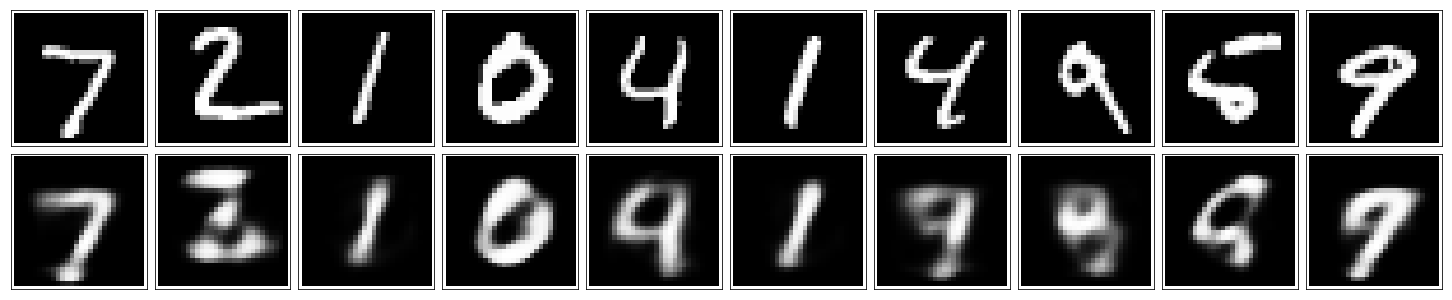

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.